In [1]:
from functions_paper import *

# FIG S8

## PREDICTIONS OF SEVERAL PARAMETER SETS

In [2]:
#READ DATA
avgdata, stddata=read_data()

#PARAMETERS
DF=pd.read_csv('results/parameter_dispersion.csv')
Temp=[22,28]
Daylength=[0,8,12,16,24]
Daylength2=np.linspace(0,24,49)#range(0,25)
Daylength2=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4]+list(range(4,25,2))
#Daylength2=list(Daylength)

#SIMULATIONS
mutants=['Col', 'pif4', 'pifq', 'PIF4ox',
         'phyB-9', 'PHYBox', 'elf3-8', 'ELF3ox',
         'COP1-OE', 'cop1-4', 'ELF3ox_cop1-4', 'elf3-8_cop1-4',
         'hy5', 'elf3-8_phyB-9', 'phyB-9_cop1-4']
Sim=[]
for index, row in DF.iterrows():
    print(index)
    L=list(row)
    L=[L[1]]+[0.232,0.411]+L[2::]+[0]
    #SIMULATION IN PYTHON
    hypo_python, tot_python=model_results(Temp,Daylength2,L,mutants)
    Sim.append(hypo_python)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


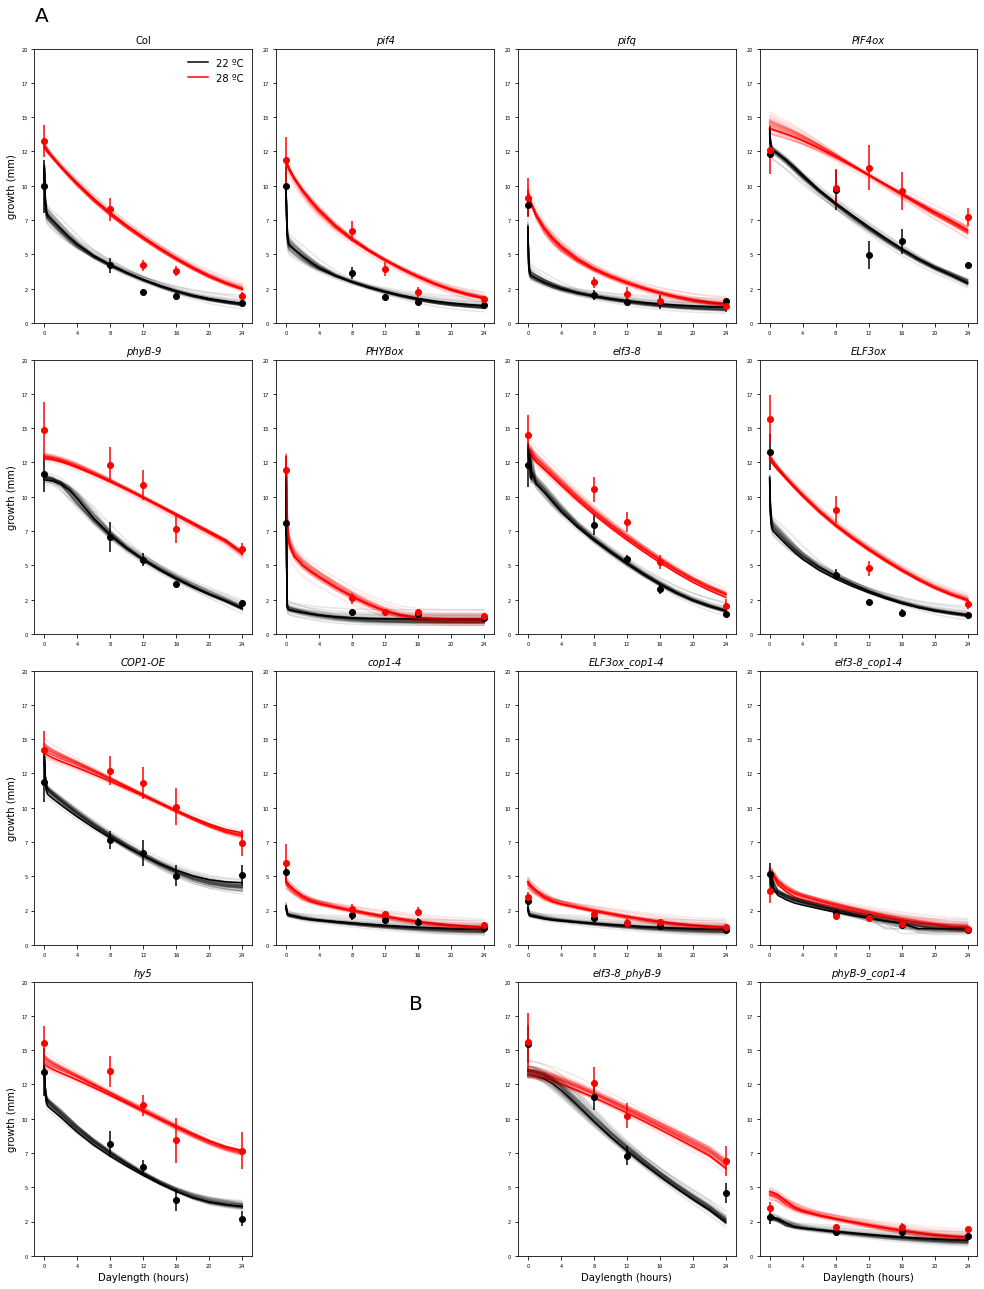

In [3]:
#PLOT
fig=plt.figure(figsize=(14,18))
ncols=4
nrows=4
count=1
for mut in mutants:
    if count==14:
        count+=1
    ax=fig.add_subplot(nrows,ncols,count)
    #PLOT SIMULATIONS PYTHON
    mut2=mut
    for i1,dat in enumerate(Sim):
        hp22=[]
        hp28=[]
        for D in Daylength2:
            key22='22_'+str(D)
            key28='28_'+str(D)
            hp22.append(dat[mut2][key22])
            hp28.append(dat[mut2][key28])  
        if i1==19:
            ax.plot(Daylength2, hp22, 'k', alpha=1, label='22 ºC')
            ax.plot(Daylength2, hp28, 'r', alpha=1, label='28 ºC')    
        ax.plot(Daylength2, hp22, 'k', alpha=0.1)
        ax.plot(Daylength2, hp28, 'r', alpha=0.1)
    #DATA
    d22=[]
    d28=[]
    s22=[]
    s28=[]
    for D in Daylength:
        key22='22_'+str(D)
        key28='28_'+str(D)
        if mut in avgdata:
            d22.append(avgdata[mut][key22])
            d28.append(avgdata[mut][key28])
            s22.append(stddata[mut][key22])
            s28.append(stddata[mut][key28])
    if mut in avgdata:
        ax.errorbar(Daylength, d22, yerr=s22, fmt='o', color='k')
        ax.errorbar(Daylength, d28, yerr=s28, fmt='o', color='r')
    if mut=='Col':
        ax.set_title(mut, size=10)
    else:
        ax.set_title(mut, style='italic', size=10)
    ax.set_ylim([0,20])
    if count==1:
        ax.legend(loc='upper right', frameon=False)
        ax.text(0,1.1,'A',fontsize=20,transform=ax.transAxes)
    if count>12:
        ax.set_xlabel('Daylength (hours)', size=10)
    if count%4==1:
        ax.set_ylabel('growth (mm)', size=10)
    if count==13:
        fig.tight_layout()
    if count==15:
        ax.text(-0.5,0.9,'B',fontsize=20,transform=ax.transAxes)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels([0,4,8,12,16,20,24], size=5)
    ax.set_yticklabels(ax.get_yticks(), size=5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    count+=1
fig.savefig('figures/fig1_parameters.pdf', bbox_inches='tight')

# FIG S9

## PARAMETER DISTRIBUTIONS

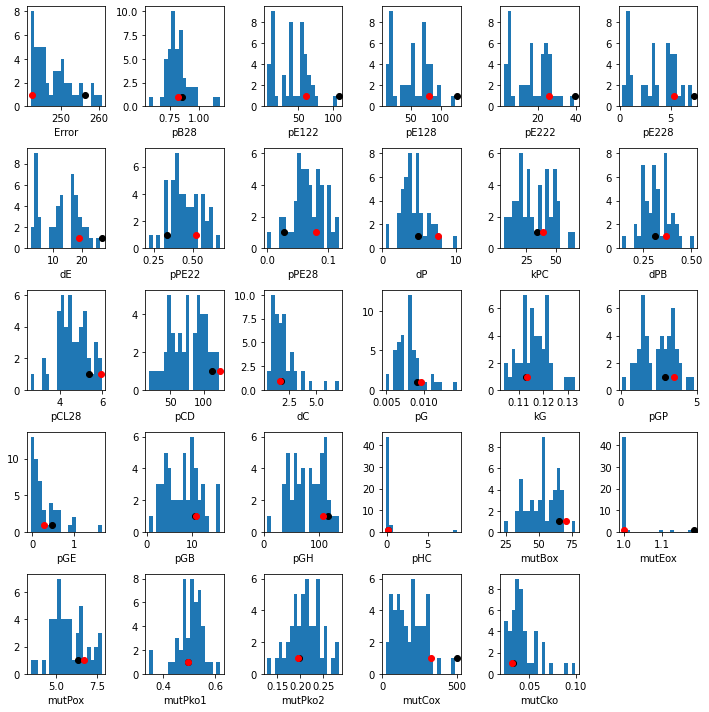

In [15]:
DF=pd.read_csv('results/parameter_dispersion.csv')
PP=DF.iloc[19]#parameter set used in the main text
Pmin=DF.iloc[23]#parameter set that minimizes the energy function
#PLOT DISTRIBUTIONS
fig=plt.figure(figsize=(10,10))
rows=5
cols=6
for i,key in enumerate(DF):
    P=DF[key]
    ax=fig.add_subplot(rows,cols,i+1)
    bins=np.linspace(P.min(),P.max(),20)
    n, bins=np.histogram(P,bins=bins)
    ax.bar(bins[:-1],n, width=bins[1]-bins[0])
    ax.set_xlabel(key)
    ax.plot(PP[i],1,'ok')
    ax.plot(Pmin[i],1,'or')
fig.tight_layout()
fig.savefig('figures/parameter_dispersion.pdf', bbox_inches='tight')

# FIG S10

## ELF3 PARAMETERS LIE ON A FIFTH-DIMENSIONAL LINEAR MANIFOLD

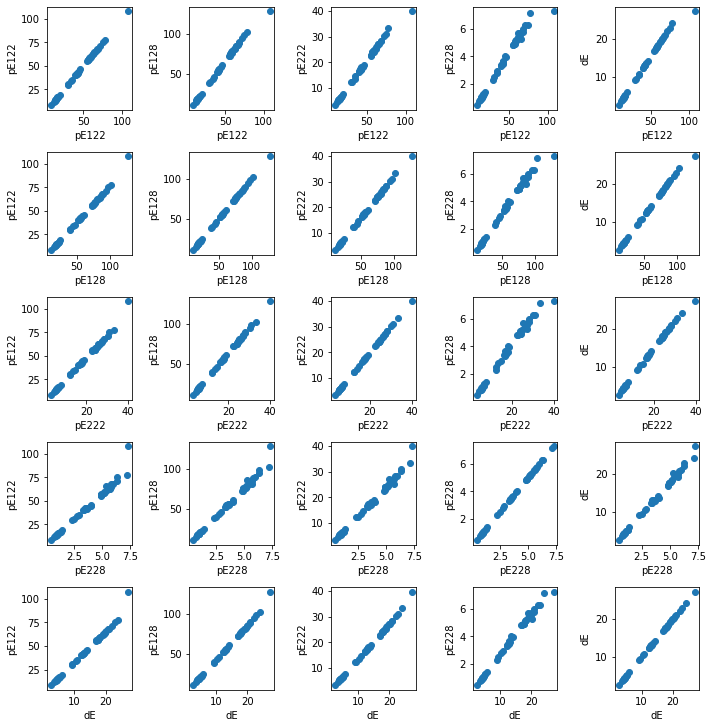

In [5]:
PN2=['pE122', 'pE128', 'pE222', 'pE228', 'dE']
rows=20
cols=5
fig=plt.figure(figsize=(10,40))
count=0
for i,p1 in enumerate(PN2):
    for j,p2 in enumerate(PN2):
        r=np.corrcoef(DF[p1],DF[p2])[0,1]
        if abs(r)<0.8:
            continue
        ax=fig.add_subplot(rows,cols,count+1)
        count+=1
        ax.plot(DF[p1],DF[p2],'o')
        ax.set_xlabel(p1)
        ax.set_ylabel(p2)
fig.tight_layout()
fig.savefig('figures/parameter_scatterplot.pdf', bbox_inches='tight')

In [6]:
#MULTILINEAR REGRESSION
from scipy.optimize import curve_fit
def line(x,a,b,c,d,e):
    return a*x[0]+b*x[1]+c*x[2]+d*x[3]+e
X=np.array(DF[PN2[1:5]].T)
Y=np.array(DF[PN2[0]])
popt, pcov = curve_fit(line,X,Y,p0=[1,1,1,1,1])
#COMPUTE R SQUARE
eT=Y-Y.mean()
ssT=np.sum(eT**2)
eR=Y-line(X,*popt)#y_hat
ssE=np.sum(eR**2)
R2=1-ssE/ssT
fit='pE122='+str(round(popt[4],2))+'+'+str(round(popt[0],2))+'pE128+'+str(round(popt[1],2))+'pE222+'+str(round(popt[2],2))+'pE228+'+str(round(popt[3],2))+'dE'
print('The line '+fit+' fits the five-dimensional dataset with an R^2 of '+str(round(R2,5)))

The line pE122=-0.62+1.81pE128+-0.76pE222+-0.61pE228+-3.21dE fits the five-dimensional dataset with an R^2 of 0.99972


# FIG S11

## SENSITIVITY ANALYSIS

In [16]:
DF=pd.read_csv('results/parameter_dispersion.csv')
keys=list(DF.columns)[1::]
L=[]
delC=[1,2,30]
for i in range(48):
    li=str(i)
    if i<10 and i>0:
        li='0'+li
    com='./sensitivity_analysis_global minerr_'+li
    subprocess.call([com], shell=True)
    SA=pd.read_csv('results/sensitivity_analysis_global_minerr_'+li+'.txt', names=['L', 'S'])
    SA=SA['S'].drop(index=delC)
    L.append(list(SA))
DF=pd.DataFrame.from_records(L, columns=keys)
DF.to_csv('results/sensitivity_analysis.csv', float_format='%.6f', index=False)

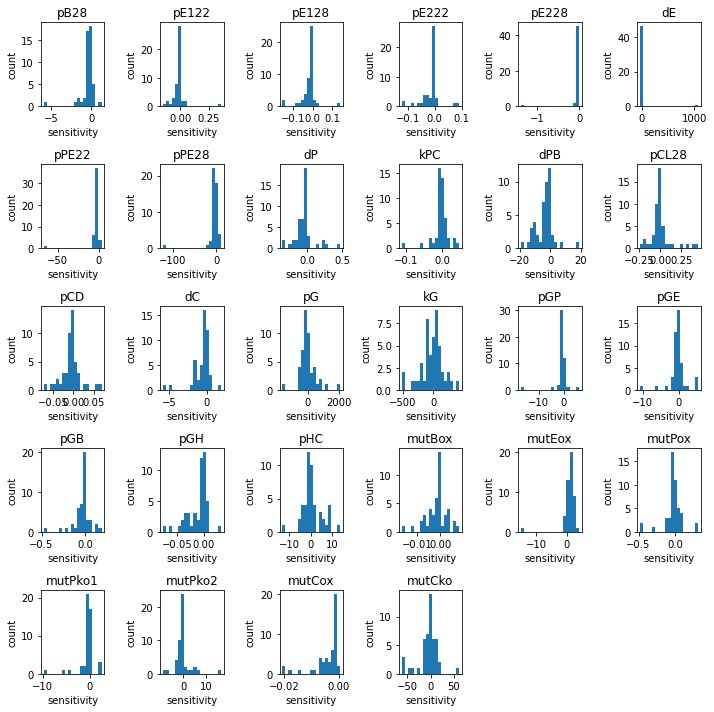

In [17]:
#PLOT DISTRIBUTIONS
DF=pd.read_csv('results/sensitivity_analysis.csv')
fig=plt.figure(figsize=(10,10))
rows=5
cols=6
for i,key in enumerate(DF):
    P=100*DF[key]
    ax=fig.add_subplot(rows,cols,i+1)
    bins=np.linspace(P.min(),P.max(),20)
    n, bins=np.histogram(P,bins=bins)
    ax.bar(bins[:-1],n, width=bins[1]-bins[0])
    ax.set_title(key)
    ax.set_xlabel('sensitivity')
    ax.set_ylabel('count')
fig.tight_layout()
fig.savefig('figures/sensitivity_analysis_global.pdf', bbox_inches='tight')